# Step-1: Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Step-2: Create the Dataset

In [7]:
# Set the random seed for reproducibility
np.random.seed(42)

# Create a synthetic Dataset
data={
    'product_id':range(1,21),
    'product_name':[f'product{i}'for i in range(1,21)],
    'category': np.random.choice(['Electronics','Clothing','Home','Sports'],20),
    'units_sold':np.random.poisson(lam=20,size=20), # Poisson distribution for sales
    'sale_date':pd.date_range(start='2025-07-01',periods=20,freq='D')
}
sales_data=pd.DataFrame(data)

# Display the first few rows of the dataset
print("Sales Data:")
print(sales_data)


Sales Data:
    product_id product_name     category  units_sold  sale_date
0            1     product1         Home          25 2025-07-01
1            2     product2       Sports          15 2025-07-02
2            3     product3  Electronics          17 2025-07-03
3            4     product4         Home          19 2025-07-04
4            5     product5         Home          21 2025-07-05
5            6     product6       Sports          17 2025-07-06
6            7     product7  Electronics          19 2025-07-07
7            8     product8  Electronics          16 2025-07-08
8            9     product9         Home          21 2025-07-09
9           10    product10     Clothing          21 2025-07-10
10          11    product11         Home          17 2025-07-11
11          12    product12         Home          22 2025-07-12
12          13    product13         Home          14 2025-07-13
13          14    product14         Home          17 2025-07-14
14          15    product15 

In [13]:
# Save the DataFrame as a CSV file
sales_data.to_csv('sales_data.csv',index=False)

In [17]:
# path location
import os
os.getcwd()

'C:\\Users\\LAHARI'

# Step-3 Descriptive Statistics

In [22]:
# Descriptive Statistics
descriptive_stats=sales_data['units_sold'].describe()

# Display descriptive statistics
print("\nDescriptive Statistics for Units Sold:")
print(descriptive_stats)

# Additional statistics
mean_sales=sales_data['units_sold'].mean()
median_sales=sales_data['units_sold'].median()
mode_sales=sales_data['units_sold'].mode()[0]
variance_sales=sales_data['units_sold'].var()
std_deviation_sales=sales_data['units_sold'].std()

# Group by category and calculate total and average sales
category_stats = sales_data.groupby('category')['units_sold'].agg(['sum', 'mean', 'std']).reset_index()
category_stats.columns = ['Category', 'Total Units Sold', 'Average Units Sold', 'Std Dev of Units Sold']

# Display the results
print("\nStatistical Analysis:")
print(f"Mean Units Sold: {mean_sales}")
print(f"Median Units Sold: {median_sales}")
print(f"Mode Units Sold: {mode_sales}")
print(f"Variance of Units Sold: {variance_sales}")
print(f"Standard Deviation of Units Sold: {std_deviation_sales}")
print("\nCategory Statistics:")
print(category_stats)


Descriptive Statistics for Units Sold:
count    20.000000
mean     18.800000
std       3.302312
min      13.000000
25%      17.000000
50%      18.500000
75%      21.000000
max      25.000000
Name: units_sold, dtype: float64

Statistical Analysis:
Mean Units Sold: 18.8
Median Units Sold: 18.5
Mode Units Sold: 17
Variance of Units Sold: 10.90526315789474
Standard Deviation of Units Sold: 3.3023117899275864

Category Statistics:
      Category  Total Units Sold  Average Units Sold  Std Dev of Units Sold
0     Clothing                21           21.000000                    NaN
1  Electronics                73           18.250000               2.217356
2         Home               181           20.111111               3.723051
3       Sports               101           16.833333               2.714160


# Step-4 Inferential Statistics

In [32]:
# Confidence Interval for the mean of units sold
confidence_level=0.95
degrees_freedom=len(sales_data['units_sold'])-1
sample_mean=mean_sales
sample_standard_error=std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score=stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error=t_score*sample_standard_error

confidence_interval=(sample_mean-margin_of_error,sample_mean+margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(17.254470507823573, 20.34552949217643)


In [34]:
# Confidence Interval for the mean of units sold
confidence_level=0.99
degrees_freedom=len(sales_data['units_sold'])-1
sample_mean=mean_sales
sample_standard_error=std_deviation_sales/np.sqrt(len(sales_data['units_sold']))

# t-score for the confidence level
t_score=stats.t.ppf((1+confidence_level)/2,degrees_freedom)
margin_of_error=t_score*sample_standard_error

confidence_interval=(sample_mean-margin_of_error,sample_mean+margin_of_error)
print("\nConfidence Interval for the Mean of Units Sold:")
print(confidence_interval)


Confidence Interval for the Mean of Units Sold:
(16.687430485978535, 20.912569514021467)


# Hypothesis Testing

In [45]:
# Hypothesis Testing(t-test)
# Null hypothesis:Mean units sold is equal to 20
# Alternative hypothesis: Mean units sold is not equal to 20

t_statistic,p_value=stats.ttest_1samp(sales_data['units_sold'],20)
print(f"T-statistic:{t_statistic},p-value:{p_value}")

if p_value<0.05:
    print("Reject the null hypothesis: The mean units sold is significantly different from 20.")
else:
    print("Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.")

T-statistic:-1.6250928099424466,p-value:0.12061572226781002
Fail to reject the null hypothesis: The mean units sold is not significantly different from 20.


# Step-5 Visualizations

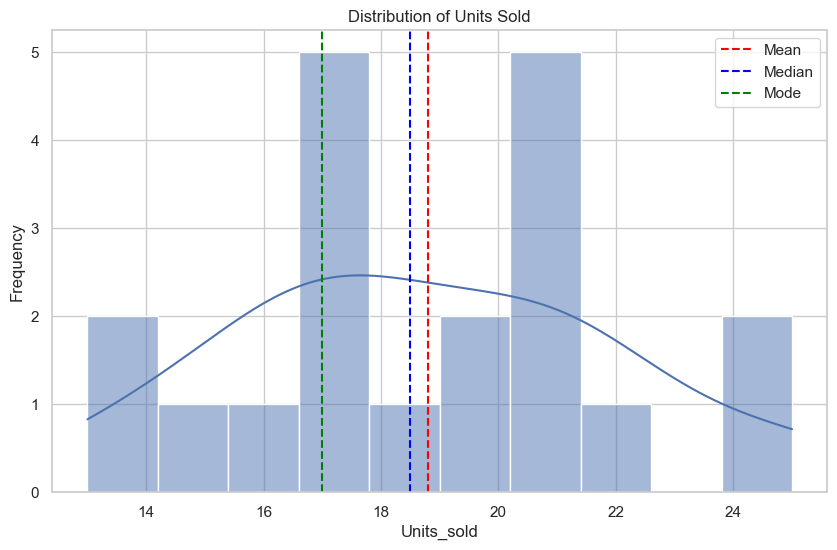

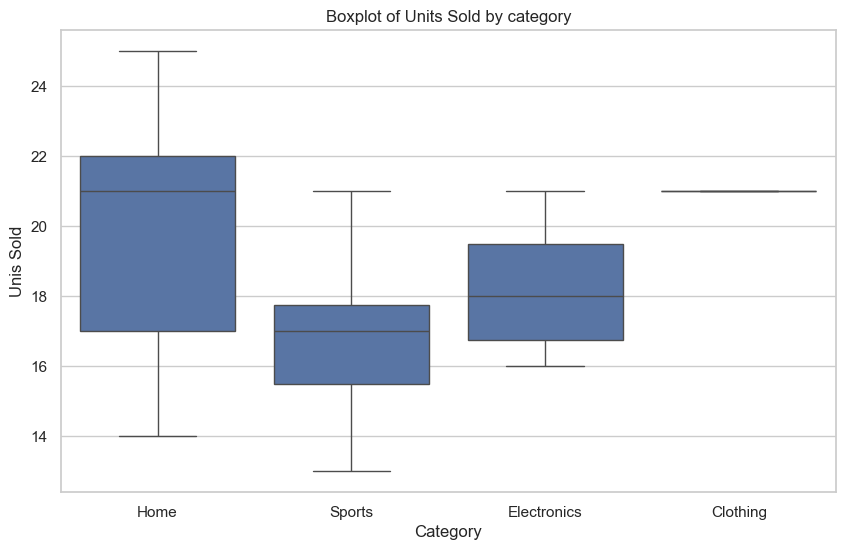

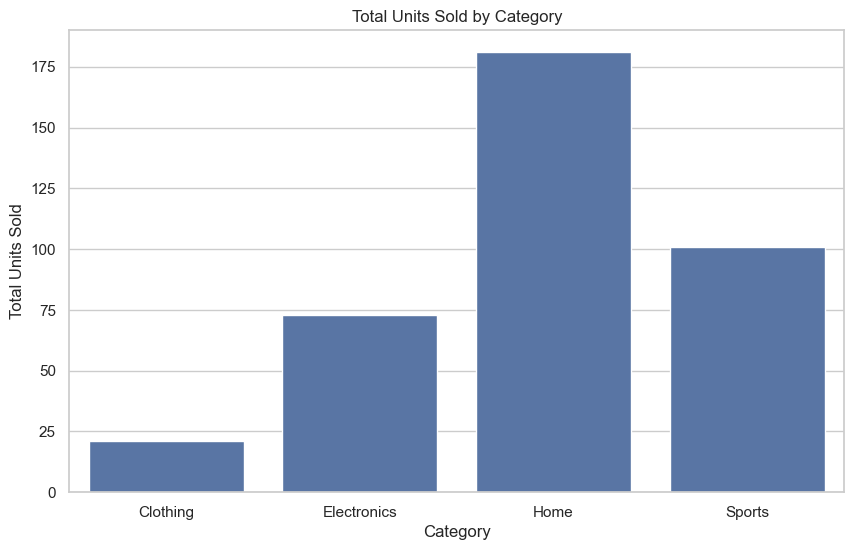

In [52]:
# Visualizations
sns.set(style='whitegrid')

#plot distribution of units sold
plt.figure(figsize=(10,6))
sns.histplot(sales_data['units_sold'],bins=10,kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units_sold')
plt.ylabel('Frequency')
plt.axvline(mean_sales,color='red',linestyle='--',label='Mean')
plt.axvline(median_sales,color='blue',linestyle='--',label='Median')
plt.axvline(mode_sales,color='green',linestyle='--',label='Mode')
plt.legend()
plt.show()

# Boxplot for units sold by category
plt.figure(figsize=(10,6))
sns.boxplot(x='category',y='units_sold',data=sales_data)
plt.title('Boxplot of Units Sold by category')
plt.xlabel('Category')
plt.ylabel('Unis Sold')
plt.show()

# Bar plot for total units sold by category
plt.figure(figsize=(10,6))
sns.barplot(x='Category',y='Total Units Sold',data=category_stats)
plt.title('Total Units Sold by Category')
plt.xlabel('Category')
plt.ylabel('Total Units Sold')
plt.show()